# Problem 1
Write a computer program that solves the Manning equation to find the normal depth in a rectangular or trapezoidal channel using the knowns of Q, S,n, c1 (which is k in your book), and the following geometric properties of the channel, bottom width b and side slope m. Test your method using the data and results presented in Example 4.1 of Moglen (2015).

In [46]:
import numpy as np
from scipy.optimize import fsolve

#Given Parameters
Q = 20
S = 0.004
n = 0.03
k = 1

#Geometry Parameters: IF  CHANNEL IS REC. SET m = None IF TRAPEZOIDAL SET m = given value
b = 3
m = 2           

if m is not None:
    def trap_manning(f, Q, b, m, n, k, S):
        A = b*f + m * f**2
        P = b + 2*f * (1 + m**2)**0.5
        return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))
    fguess = 1
    y_o = fsolve(trap_manning, fguess, args=(Q, b, m, n, k, S))
    print("Normal Depth in Trapezoidal Channel =", np.round(y_o, 2))
else: 
    def rec_manning(f, Q, b, n, k, S):
        A = b * f
        P = b + 2 * f
        return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))
    fguess = 1
    y_o = fsolve(rec_manning, fguess, args=(Q, b, n, k, S))
    print("Normal Depth in Rectangular Channel =", np.round(y_o, 2))


Normal Depth in Trapezoidal Channel = [1.58]


# Problem 2

**Problem 4.4 of Moglen (2015)**

Given:
Q = 50 ft3/s.
S = 0.01 ft/ft.
b = 20 ft.
Manning’s n = 0.02.

Find:
Critical depth: yc
Normal depth: y0

Classify reach: (steep, mild or critical?)
Examine how modest changes in the “givens” affect normal depth and the 
Froude number. Let each of the parameters shown below change by a 
modest amount (suggest ~1 to –2%). Fill out the following influence chart:

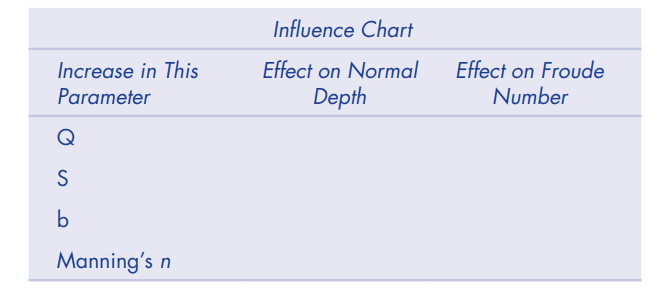

## Normal Depth

In [47]:
import numpy as np
from scipy.optimize import fsolve

#Given Parameters
Q = 50
S = 0.01
n = 0.02
k = 1.49

#Geometry Parameters: IF  CHANNEL IS REC. SET m = None IF TRAPEZOIDAL SET m = given value
b = 20
m = None

if m is not None:
    def trap_manning(f, b, m, n, k, S):
        A = b*f + m * f**2
        P = b + 2*f * (1 + m**2)**0.5
        return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))
    fguess = 1
    y_o = fsolve(trap_manning, fguess, args=(b, m, n, k, S))
    print("Normal Depth in Trapezoidal Channel =", np.round(y_o, 2))
else: 
    def rec_manning(f, Q, b, n, k, S):
        A = b * f
        P = b + 2 * f
        return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))
    fguess = 1
    y_o = fsolve(rec_manning, fguess, args=(Q, b, n, k, S))
    print("Normal Depth in Rectangular Channel =", np.round(y_o, 2))


Normal Depth in Rectangular Channel = [0.53]


## Critical Depth

In [48]:
Q = 50
S = 0.01
n = 0.02
b = 20
g = 32.1741

q = Q / b
y_c = ((q**2 / g)**(1/3))

print("Critical Depth (ft)=", round(y_c, 2))

Critical Depth (ft)= 0.58


## Reach Classification and Examination of Change on Normal Depth and Froude Number

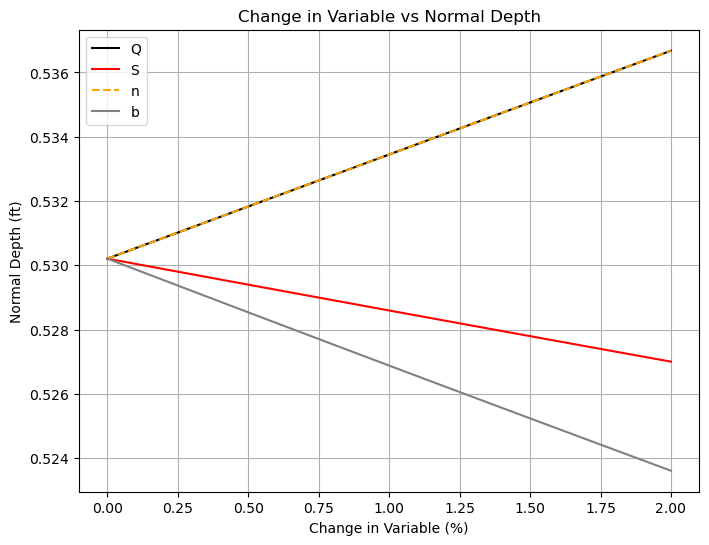

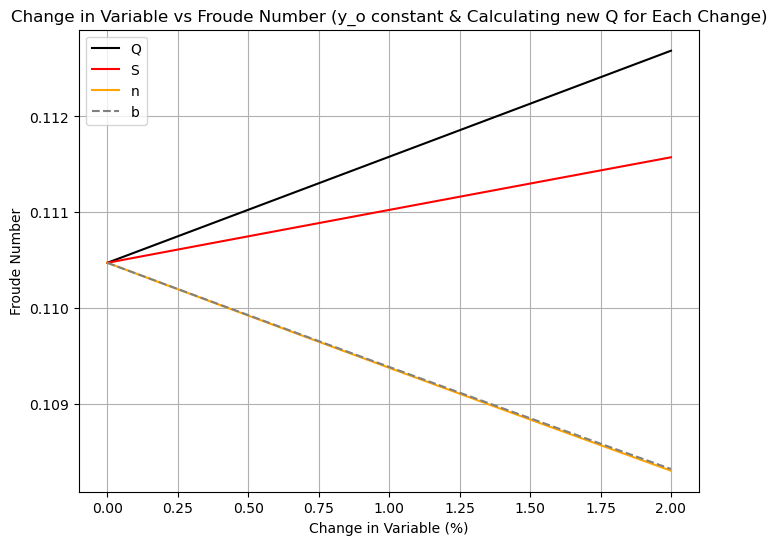

  Variable (2% change)  Normal Depth (ft)  Froude Number Reach Classification
1                    Q           0.536676       0.112684                 Mild
2                    S           0.527002       0.111574                 Mild
3                    n           0.536676       0.108309                 Mild
4                    b           0.523608       0.108326                 Mild


In [49]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

Q_list = np.arange(50, 51.01, 0.1)
S_list = np.arange(0.01, 0.01022, 0.00002)
n_list = np.arange(0.02, 0.02044, 0.00004)
b_list = np.arange(20, 20.401, 0.04)
rate_change = np.arange(0, 2.2, 0.2)

Q = 50
S = 0.01
n = 0.02
b = 20
k = 1.49
g = 32.1741
y_o = 0.53020644

#calculating and graphing change in normal depth
y_o_Q = []
y_o_S = []
y_o_n = []
y_o_b = []

def manning_Q(f, b, n, k, S, Q_value):
    A = b * f
    P = b + 2 * f
    return (Q_value - ((k / n) * A * (A / P) ** (2 / 3) * S ** 0.5))

def manning_S(f, b, n, k, S, S_value):
    A = b * f
    P = b + 2 * f
    return (Q - ((k / n) * A * (A / P) ** (2 / 3) * S_value ** 0.5))

def manning_n(f, b, n, k, S, n_value):
    A = b * f
    P = b + 2 * f
    return (Q - ((k / n_value) * A * (A / P) ** (2 / 3) * S ** 0.5))

def manning_b(f, b, n, k, S, b_value):
    A = b_value * f
    P = b_value + 2 * f
    return (Q - ((k / n) * A * (A / P) ** (2 / 3) * S ** 0.5))

fguess = 1

for Q_value in Q_list:
    y_o_value_Q = fsolve(manning_Q, fguess, args=(b, n, k, S, Q_value))
    y_o_Q.append(y_o_value_Q[0])

for S_value in S_list:
    y_o_value_S = fsolve(manning_S, fguess, args=(b, n, k, S_value, S_value))
    y_o_S.append(y_o_value_S[0])

for n_value in n_list:
    y_o_value_n = fsolve(manning_n, fguess, args=(b, n_value, k, S, n_value))
    y_o_n.append(y_o_value_n[0])

for b_value in b_list:
    y_o_value_b = fsolve(manning_b, fguess, args=(b_value, n, k, S, b_value))
    y_o_b.append(y_o_value_b[0])

plt.figure(figsize=(8,6))
plt.plot(rate_change, y_o_Q, color="black", label="Q")
plt.plot(rate_change, y_o_S, color="red", label="S")
plt.plot(rate_change, y_o_n, color="orange", label="n", linestyle = "dashed")
plt.plot(rate_change, y_o_b, color="grey", label="b")
plt.xlabel("Change in Variable (%)")
plt.ylabel("Normal Depth (ft)")
plt.title("Change in Variable vs Normal Depth")
plt.grid(True)
plt.legend()
plt.show()

# calculating and graphing change in Froude number

Fr_Q = []
Fr_S = []
Fr_n = []
Fr_b = []

for Q_value in Q_list:
    Fr_Q_value = (Q_value / (y_o * b)) / (g * (b * y_o) ** 3 / (b + 2 * y_o)) ** 0.5
    Fr_Q.append(Fr_Q_value)

for S_value in S_list:
    A = b * y_o
    P = b + 2 * y_o
    Q_S = ((k / n) * A * (A / P) ** (2 / 3) * S_value ** 0.5)
    Fr_S_value = (Q_S / (y_o * b)) / (g * (A) ** 3 / P) ** 0.5
    Fr_S.append(Fr_S_value)

for n_value in n_list:
    A = b * y_o
    P = b + 2 * y_o
    Q_n = ((k / n_value) * A * (A / P) ** (2 / 3) * S ** 0.5)
    Fr_n_value = (Q_n / (y_o * b)) / (g * (A) ** 3 / P) ** 0.5
    Fr_n.append(Fr_n_value)

for b_value in b_list:
    A_list = b_value * y_o
    P_list = b_value + 2 * y_o
    Q_b = ((k / n) * A_list * (A_list / P_list) ** (2 / 3) * S ** 0.5)
    Fr_b_value = (Q_b / (y_o * b_value)) / (g * (A_list) ** 3 / P_list) ** 0.5
    Fr_b.append(Fr_b_value)

plt.figure(figsize=(8, 6))
plt.plot(rate_change, Fr_Q, color="black", label="Q")
plt.plot(rate_change, Fr_S, color="red", label="S")
plt.plot(rate_change, Fr_n, color="orange", label="n")
plt.plot(rate_change, Fr_b, color="grey", label="b", linestyle= "dashed")
plt.xlabel("Change in Variable (%)")
plt.ylabel("Froude Number")
plt.title("Change in Variable vs Froude Number (y_o constant & Calculating new Q for Each Change)")
plt.grid(True)
plt.legend()
plt.show()

def reach_class(Fr):
    if Fr == 1:
        return "Critical"
    elif Fr > 1:
        return "Steep"
    elif Fr < 1:
        return"Mild"

# Data Table for 2% change
max_index = len(rate_change)
data = {
    "Variable (2% change)": ["Q", "S", "n", "b"],
    "Normal Depth (ft)": [y_o_Q[max_index - 1], y_o_S[max_index - 1], y_o_n[max_index - 1], y_o_b[max_index - 1]],
    "Froude Number": [Fr_Q[max_index - 1], Fr_S[max_index - 1], Fr_n[max_index - 1], Fr_b[max_index - 1]],
    "Reach Classification": [reach_class(Fr_Q[max_index - 1]), reach_class(Fr_S[max_index - 1]), reach_class(Fr_n[max_index - 1]), reach_class(Fr_b[max_index - 1])]
}

df = pd.DataFrame(data)
df.index = ["1", "2", "3", "4"]

print(df)

# Problem 3

**Problem 4.5 of Moglen (2015)**

Design a rectangular channel. The discharge is 50 ft3/s, slope is 0.01 ft/ft, Manning’s n is 0.02 (i.e., like in Problem 4.4). Your design is defined as most efficient if the cross-sectional area is minimized. What channel width, b, will produce the most efficient channel for these conditions?

$A = by $

$P = b + 2y = (A/y) + 2y$

$R = \frac{by}{b + 2y}$

Minimize wetted perimeter $\frac{dP}{dy} = 0$

$\frac{d}{dy} \left( \frac{A}{y} + 2y \right)$

$-\frac{A}{y^2} = -2$

$\frac{A}{y^2} = 2$

$\frac{by}{y^2} = 2$

$\boxed{b = 2y}$

$R = \frac{y \cdot 2y}{2y + 2y}$

$\boxed{R = \frac{y}{2}}$

$\boxed{A = 2y^2}$

$[Q - \frac{k}{n} \cdot 2y^2 \left(\frac{y}{2}\right)^{\frac{2}{3}} S^{0.5}]$

In [50]:
from scipy.optimize import fsolve
import numpy as np

Q = 50
S = 0.01
n = 0.02
k = 1.49

def y_solve(y, Q, k, n, S):
    return(Q - ((k/n) * (2*y**2) * (y/2)**(2/3) * S**0.5))
yguess = 2
y = fsolve(y_solve, yguess, args=(Q, k, n, S))

b = y*2

print("height (y in ft)=", np.round(y, 2))
print("width (b in ft)=", np.round(b, 2))

height (y in ft)= [1.87]
width (b in ft)= [3.75]


# Problem 4

**Problem 4.7 of Moglen (2015)** 

Using the channel roughness, geometry, and slope from Example 4.1,

a. Repeat this problem for discharges of Q0 = 10 m3/s and 30 m3/s.

b. Using the result directly from Example 4.1 and from (a), determine the Chézy C value for each of the three discharges.

c. Calculate the Froude number for each of the three discharges and 
determine if the reach is steep, mild, or critical.

## 4.a

Repeat this problem for discharges of Q0 = 10 m3/s and 30 m3/s.

In [51]:
import numpy as np
from scipy.optimize import fsolve

Q_1 = 10
Q_2 = 20
Q_3 = 30
S = 0.004
n = 0.03
k = 1
b = 3
m = 2

def trap_manning(f, Q, b, m, n, k, S):
    A = b*f + m * f**2
    P = b + 2*f * (1 + m**2)**0.5
    return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))

fguess = 1
y_o_1 = fsolve(trap_manning, fguess, args=(Q_1, b, m, n, k, S))
y_o_2 = fsolve(trap_manning, fguess, args=(Q_2, b, m, n, k, S))
y_o_3 = fsolve(trap_manning, fguess, args=(Q_3, b, m, n, k, S))
print("Q of 10 m^3/s =", np.round(y_o_1, 2))
print("Q of 20 m^3/s =", np.round(y_o_2, 2))
print("Q of 30 m^3/s =", np.round(y_o_3, 2))


Q of 10 m^3/s = [1.12]
Q of 20 m^3/s = [1.58]
Q of 30 m^3/s = [1.92]


## 4.b

Using the result directly from Example 4.1 and from (a), determine the Chézy C value for each of the three discharges.

$$
v = C \cdot R^{1/2} \cdot S^{1/2}
$$

In [52]:
import numpy as np
from scipy.optimize import fsolve

Q_1 = 10
Q_2 = 20
Q_3 = 30
S = 0.004
n = 0.03
k = 1
b = 3
m = 2

def trap_manning(f, Q, b, m, n, k, S):
    A = b*f + m * f**2
    P = b + 2*f * (1 + m**2)**0.5
    return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))

fguess = 1
y_o_1 = fsolve(trap_manning, fguess, args=(Q_1, b, m, n, k, S))
y_o_2 = fsolve(trap_manning, fguess, args=(Q_2, b, m, n, k, S))
y_o_3 = fsolve(trap_manning, fguess, args=(Q_3, b, m, n, k, S))


def chezy(c, Q, y, b, m, S):
    R = (b * y + m * y * y) / (b + 2 * y *(1 + m**2)**0.5)
    A = b*y + m * y**2
    return(Q - (A * c * (R)**0.5 * S**0.5))

cguess = 1
c_1 = fsolve(chezy, cguess, args=(Q_1, y_o_1, b, m, S))
c_2 = fsolve(chezy, cguess, args=(Q_2, y_o_2, b, m, S))
c_3 = fsolve(chezy, cguess, args=(Q_3, y_o_3, b, m, S))

print("Chezy C Value at Q of 10 m^3/s =", np.round(c_1, 2))
print("Chezy C Value at Q of 20 m^3/s =", np.round(c_2, 2))
print("Chezy C Value at Q of 30 m^3/s =", np.round(c_3, 2))

Chezy C Value at Q of 10 m^3/s = [31.64]
Chezy C Value at Q of 20 m^3/s = [33.14]
Chezy C Value at Q of 30 m^3/s = [34.03]


## 4.c

Calculate the Froude number for each of the three discharges and determine if the reach is steep, mild, or critical.

In [53]:
import numpy as np
from scipy.optimize import fsolve

Q_1 = 10
Q_2 = 20
Q_3 = 30
S = 0.004
n = 0.03
k = 1
b = 3
m = 2
g = 9.81

def trap_manning(f, Q, b, m, n, k, S):
    A = b*f + m * f**2
    P = b + 2*f * (1 + m**2)**0.5
    return (Q - ((k/n) * A * (A/P)**(2/3) * S**0.5))

fguess = 1
y_o_1 = fsolve(trap_manning, fguess, args=(Q_1, b, m, n, k, S))
y_o_2 = fsolve(trap_manning, fguess, args=(Q_2, b, m, n, k, S))
y_o_3 = fsolve(trap_manning, fguess, args=(Q_3, b, m, n, k, S))

def froude_class(Q, y, b, m, S):
    D = (b * y + m * y * y) / (b + 2 * m * y)
    A = b * y + m * y**2
    v = Q / A
    return(v / (g * D)**0.5)

fr_1 = froude_class(Q_1, y_o_1, b, m, S)
fr_2 = froude_class(Q_2, y_o_2, b, m, S)
fr_3 = froude_class(Q_3, y_o_3, b, m, S)

if (fr_1 == 1):
    print("Critical, F_r at Q of 10 m^3/s =", np.round(fr_1, 2))
elif (fr_1 > 1): 
    print("Steep, F_r at Q of 10 m^3/s =", np.round(fr_1, 2))
else:
    print("Mild, F_r at Q of 10 m^3/s =", np.round(fr_1, 2))
    
if (fr_2 == 1):
    print("Critical, F_r at Q of 20 m^3/s =", np.round(fr_2, 2))
elif (fr_2 > 1): 
    print("Steep, F_r at Q of 20 m^3/s =", np.round(fr_2, 2))
else:
    print("Mild, F_r at Q of 20 m^3/s =", np.round(fr_2, 2))

if (fr_3 == 1):
    print("Critical, F_r at Q of 30 m^3/s =", np.round(fr_3, 2))
elif (fr_3 > 1): 
    print("Steep, F_r at Q of 30 m^3/s =", np.round(fr_3, 2))
else:
    print("Mild, F_r at Q of 30 m^3/s =", np.round(fr_3, 2))

Mild, F_r at Q of 10 m^3/s = [0.62]
Mild, F_r at Q of 20 m^3/s = [0.64]
Mild, F_r at Q of 30 m^3/s = [0.66]


# Problem 5

The geometry of a river cross section can be approximated as the compound
channel shown below in the figure and table. If the channel bed slope is
So = 0.0009, calculate the depth of flow when the discharge is Q = 57000 cfs.
Hint: take the floodplain channels to be rectangular.

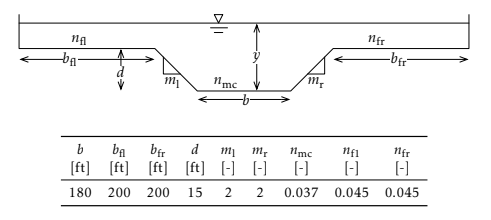

$$
Q_{total} = Q_{mc} + Q_{fl} + Q_{fr}
$$

$$
Q_{fl} = Q_{fr} \rightarrow Q_{fl} + Q_{fr} = 2Q_f
$$

$$
Q_{total} = \left( \frac{k}{n_{mc}} \cdot A_{mc} \cdot {\frac{A_{mc}}{P_{mc}}}^{2/3} \cdot S^{1/2} \right) + 2 \cdot \left( \frac{k}{n_f} \cdot A_f \cdot {\frac{A_f}{P_f}}^{2/3} \cdot S^{1/2} \right)
$$

$ A_{mc} = (b_{mc} \cdot d + m \cdot d^2) + (b_{mc} + 2 \cdot m \cdot d) \cdot y$

$ P_{mc} = \left( b_{mc} + 2 \cdot d \cdot \sqrt{1 + m^2} \right) + 2 \cdot y$

$$
Q_{total} = \left( \frac{k}{n_{mc}} \cdot \left[ (b_{mc}  d + m  d^2) + (b_{mc} + 2  m  d)   y \right] \cdot \left[ \frac{(b_{mc}  d + m  d^2) + (b_{mc} + 2  m  d)  y}{\left( b_{mc} + 2 d  \sqrt{1 + m^2} \right) + 2 \cdot y} \right] ^{2/3} \cdot S^{1/2} \right) + 2 \cdot \left( \frac{k}{n_f} \cdot A_f \cdot {\frac{A_f}{P_f}}^{2/3} \cdot S^{1/2} \right)
$$

$$
y_{o-in-channel} = y_{solved} + d
$$

In [54]:
import numpy as np
from scipy.optimize import fsolve

Q = 57000
S = 0.0009
b_mc = 180
b_f = 200
m = 2
n_mc = 0.37
n_f = 0.045
d = 15
k = 1.49

def y_depth(y, Q, S, b_mc, b_f, m, n_mc, n_f, d, k):
    A_f = b_f * y
    P_f = b_f + 2 * y
    Q_f = 2 * ((k/n_f)* A_f * (A_f / P_f)**(2/3) * S**0.5)
    A_mc = (b_mc * d + m * d**2) + ((b_mc + 2 * m * d) * y)
    P_mc = (b + 2 * y * (1 + m**2)**0.5) + 2 * y
    Q_mc = (k/n_mc)* A_mc * (A_mc / P_mc)**(2/3) * S**0.5
    return(Q - (Q_f + Q_mc))
yguess = 10

y_o_f = fsolve(y_depth, yguess, args=(Q, S, b_mc, b_f, m, n_mc, n_f, d, k))
y_o_mc = y_o_f + d

print("Normal Depth in Floodplain (ft) =", np.round(y_o_f, 2))
print("Normal Depth in Main Channel (ft) =", np.round(y_o_mc, 2))

Normal Depth in Floodplain (ft) = [17.7]
Normal Depth in Main Channel (ft) = [32.7]


# Problem 6
(Graduate Students Only): The goal of this problem is to get familiar with
the Manning-Strickler resistance equation,

$$
\frac{U}{u_*} = a_r \left( \frac{y}{z'} \right) ^\frac{1}{6}
$$

where U is the depth averaged velocity. Recall that u∗ = (τB/ρ)^0.5. Assume a
wide rectangular channel cross section for all aspects of the problem. One
implication of this is that U = V .

(a) Use the Manning equation, along with eq. 1, to develop an expression
that gives you the Manning n value as a function of z'
. With such an
expression, you can estimate n from the diameter of the sediment on
the river bed, d.

(b) What is the Manning n value associated with a bed dominated by 100
mm diameter cobbles? Take z' = 2d and α_r = 8.1

(c) Rearrange the Manning-Strickler equation so that you have an explicit
equation for y given Q, z', and b (the channel bottom width). Remember,
for uniform flow, τ_B = γyS.

(d) What is the flow depth you get if d = 100 mm and, b = 4 m and Q = 2
cms with S = 0.15%? How does this compare to the depth predicted by
the Manning equation? Take α_r = 8.1.

## 6a

Use the Manning equation, along with eq. 1, to develop an expression
that gives you the Manning n value as a function of z'
. With such an
expression, you can estimate n from the diameter of the sediment on
the river bed, d.

$$
\frac{U}{u_*} = a_r \left( \frac{y}{z'} \right) ^\frac{1}{6}
$$

$U = v = \frac{k}{n} R^{2/3} S ^{1/2}$, 

$u* = (\tau / \rho)^{1/2}$ 

$\tau = \rho \cdot g \cdot R \cdot S$

$$
\frac{\frac{k}{n} R^{2/3} S ^{1/2}}{\sqrt{\frac{\rho \cdot g \cdot R \cdot S}{\rho}}} = a_r \left( \frac{R}{z'} \right) ^\frac{1}{6}
$$


$$
\frac{k \cdot R^{2/3} \cdot S^{1/2}}{g^{1/2} \cdot R^{1/2} \cdot S^{1/2} \cdot n} = \alpha_r \cdot \frac{R^{1/6}}{{z'}^{1/6}} 
$$


$$
\frac{R^{2/3}}{R^{1/2} \cdot R^{1/6} \cdot n} = \frac{\alpha_r \cdot g^{1/2}}{k \cdot {z'}^{1/6}}
$$

$$
\frac{1}{n} = \frac{\alpha_r \cdot g^{1/2}}{k \cdot {z'}^{1/6}}
$$

$$
\boxed{
n = \frac{k \cdot {z'}^{1/6}}{\alpha_r \cdot g^{1/2}}
}
$$

## 6b

What is the Manning n value associated with a bed dominated by 100
mm diameter cobbles? Take z' = 2d and α_r = 8.1

In [55]:
z = (100 / 1000)* 2
a = 8.1
y = 0.07
k = 1
g = 9.81 

n = (k * (z)**(1/6)) / (a * g**0.5)

print("mannings n value =", round(n, 4))

mannings n value = 0.0301


## 6c

Rearrange the Manning-Strickler equation so that you have an explicit
equation for y given Q, z', and b (the channel bottom width). Remember,
for uniform flow, τ_B = γyS.

**Assuming Rectangular Channel**

$A = b * y$, $R = \frac{by}{b + 2y}$

$$
\frac{\frac{Q}{b \cdot y}}{\sqrt{\frac{\rho \cdot g \cdot R \cdot S}{\rho}}} = \alpha_r \left( \frac{R}{z'} \right) ^{1/6}
$$

$$
\frac{Q}{g^{1/2} R^{1/2} S^{1/2} b} = \alpha_r y \left( \frac{R}{z'} \right)^{1/6}
$$

$$
\frac{Q}{g^{1/2} S^{1/2} b \alpha_r} = y \left( \frac{R}{z'} \right)^{1/6}
$$

$$
\frac{Q \cdot {z'}^{1/2}}{g^{1/2} S^{1/2} b \alpha_r} = R^{1/6} \cdot R^{1/2} \cdot y
$$

$$
\boxed{
\frac{Q \cdot {z'}^{1/2}}{g^{1/2} \cdot S^{1/2} \cdot b \cdot \alpha_r} = \left( \frac{by}{b + 2y} \right)^{2/3} \cdot y
}
$$

## 6d

What is the flow depth you get if d = 100 mm and, b = 4 m and Q = 2
cms with S = 0.15%? How does this compare to the depth predicted by
the Manning equation? Take α_r = 8.1.

In [56]:
from scipy.optimize import fsolve
import numpy as np

z = (100 / 1000)*2
b = 4
Q = 2
S = 0.0015
a = 8.1
n = 0.0301
k = 1
g = 9.81
gamma = 9810 #N/m^3

def y_solve(y, Q, a, z, g, S, b):
    LHS = ((Q * z**(1/6))/(g**0.5 * S**0.5 * b * a))
    R = b * y / (b + 2 * y)
    RHS = y * R**(2/3)
    return (RHS - LHS)
yguess = 1
y_calc = fsolve(y_solve, yguess, args=(Q, a, z, g, S, b))


def manning(y, b, Q, k, n, S):
    A = b * y
    R = b * y /(b + 2 * y)
    return (Q - ((k/n) * A * R**(2/3) * S**0.5))
y_manning = fsolve(manning, yguess, args=(b, Q, k, n, S))


print("flow depth using Manning-Strickler (m)=", y_calc)
print("flow depth using Manning eq with calculated n (m)=", y_manning)

flow depth using Manning-Strickler (m)= [0.63369472]
flow depth using Manning eq with calculated n (m)= [0.63309541]


**As seen above the values for the calculated depth were very close between the manning-strickler and manning equation. There was a difference of about 0.0007 (m) between the two calculation methods**